Installare monai

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install 'monai[nibabel, skimage, pillow, tensorboard, gdown, ignite, torchvision, itk, tqdm, lmdb, psutil, cucim, openslide, pandas, einops, transformers, mlflow, matplotlib, tensorboardX, tifffile, imagecodecs, pyyaml, fire, jsonschema, pynrrd, pydicom, h5py]'



Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 KB 34.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.1/264.1 KB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 105.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install segmentation-models-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 18.9 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=410487f478db3f3fd7c94101daf16956f43bc7311a27d1bcf58acb9c460792b0
  Stored in directory: /root/.cache/pip/wheels/84/b9/90/25a0195cf95fb5533db96f1c77ea3f296b7cc86ae8ae48e3dc
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60966 sha256=1032f8afe2f51bc23c78610cf52a34a50195fcd82c9ef2f0f278599c687620ba
  Stored in directory: /root/.cache/pip/wheels/ed/fa/b9/5c82b59d905f95542a192b883c0cc0082407ea2f54beb2f9e6
Successfully bu

Import librerie utili

In [3]:

import logging
import os
import shutil
import sys
import tempfile
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


import torch
from torch import nn
from PIL import Image
from torch.utils.tensorboard import SummaryWriter


import monai
from monai.data import CacheDataset, Dataset, decollate_batch, DataLoader
from monai.inferers import sliding_window_inference
from monai.metrics import DiceMetric
from monai.transforms import (
    Activations,
    AsDiscrete,
    AddChanneld,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    Resized,
    EnsureChannelFirstd,
    RandFlipd,
    RandCropByPosNegLabeld,
    RandShiftIntensityd,
    ScaleIntensityRanged,
    DataStats,
    Spacingd,
    AsDiscreted,
    LabelToMaskd,
    RandRotate90d,
    EnsureType,
    SaveImaged,
    Invertd,
    EnsureTyped,
    ToTensord,
    RandAffined,
    EnsureTyped,
    CenterSpatialCropd    

)

from monai.config import print_config
from monai.utils import first,get_torch_version_tuple, set_determinism
from monai.losses import DiceLoss,DiceCELoss
from monai.networks.nets import UNet, UNETR
from monai.networks.layers import Norm


import segmentation_models_pytorch as smp

print_config()

if get_torch_version_tuple() < (1, 6):
    raise RuntimeError(
        "AMP feature only exists in PyTorch version greater than v1.6."
    )

MONAI version: 1.1.0
Numpy version: 1.21.6
Pytorch version: 1.13.1+cu116
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: a2ec3752f54bfc3b40e7952234fbeb5452ed63e3
MONAI __file__: /usr/local/lib/python3.8/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.10
Nibabel version: 3.0.2
scikit-image version: 0.18.3
Pillow version: 7.1.2
Tensorboard version: 2.9.1
gdown version: 4.4.0
TorchVision version: 0.14.1+cu116
tqdm version: 4.64.1
lmdb version: 0.99
psutil version: 5.4.8
pandas version: 1.3.5
einops version: 0.6.0
transformers version: 4.21.3
mlflow version: 2.1.1
pynrrd version: 1.0.0

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



Set determinism per un training ripetibile

In [4]:
SEED = 3  
set_determinism(SEED)

Dictionaries

In [5]:
# main_dir = 'drive/MyDrive/tesi/PROVE 2D'
# directory= os.path.join(main_dir,'DATASET 2D','all image ridotto (training)')
#directory = 'drive/MyDrive/tesi/PROVE 2D/DATASET 2D/ all image ridotto (training)'
dir____='drive/MyDrive/tesi/PROVE 2D/DATASET 2D/all image ridotto (training) '
train_IMG_path = sorted(glob(os.path.join(dir____,'imagesTr-coscia','*.png')))
train_MASK_path = sorted(glob(os.path.join(dir____,'labelsTr-coscia','*.png')))


val_IMG_path = sorted(glob(os.path.join(dir____,'imagesVl-coscia','*.png')))
val_MASK_path = sorted(glob(os.path.join(dir____,'labelsVl-coscia','*.png')))


train_files = [{"image": image_name, "label": mask_name} for image_name,mask_name in zip(train_IMG_path,train_MASK_path)]
val_files = [{"image": image_name, "label": mask_name} for image_name,mask_name in zip(val_IMG_path,val_MASK_path)]

#train_files = train_files[59:]


In [6]:

def transformations():
    train_transforms = Compose(
        [
            LoadImaged(keys=["image", "label"]),
            EnsureChannelFirstd(keys=["image", "label"]),
            #consideriamo le patches contenenti tutta l'immagine per l'allenamento, senza crop

            # RandCropByPosNegLabeld(
            #     keys=["image", "label"],
            #     label_key="label",
            #     spatial_size=[112,112],
            #     pos=1,
            #     neg=1,
            #     num_samples=4,
            #     image_key="image",
            #     image_threshold=0,
            # ),
           
            RandFlipd(
                keys=["image", "label"],
                spatial_axis=[0],
                prob=0.10,
            ),
            RandFlipd(
                keys=["image", "label"],
                spatial_axis=[1],
                prob=0.10,
            ),
            RandRotate90d(
                keys=["image", "label"],
                prob=0.10,
                spatial_axes=[0, 1]
            ),
            RandShiftIntensityd(
                keys=["image"],
                offsets=0.10,
                prob=0.50,
            ),
            ToTensord(keys=["image", "label"])
        ] )      


    #trasformazioni del validation
    val_transforms = Compose(
        [
            LoadImaged(keys=["image", "label"]),
            EnsureChannelFirstd(keys=["image", "label"]),
            ToTensord(keys=["image", "label"])
        ]
    )
    return train_transforms, val_transforms


def train_process(amp=False):
    train_transforms, val_transforms = transformations()
    train_ds = Dataset(train_files , train_transforms)
    #train_loader = DataLoader( train_ds, batch_size=2)
    train_loader = DataLoader( train_ds, batch_size=2, shuffle=True, num_workers=4)

    val_ds = Dataset(val_files , val_transforms)
    val_loader = DataLoader( val_ds, batch_size=1, num_workers=4)
    
    model_dir = os.path.join(dir____,'MODEL_nozeros')

    if not os.path.exists(model_dir):
      os.mkdir(model_dir)
    device =  torch.device("cuda" if torch.cuda.is_available() else "cpu") 
    # model = UNet(
    #     spatial_dims=3,
    #     in_channels=1,
    #     out_channels=2,
    #     channels=(16, 32, 64, 128, 256),
    #     strides=(2, 2, 2, 2),
    #     num_res_units=2,
    #     norm=Norm.BATCH,
    # ).to(device)
    
    model = smp.Unet('resnet50',
                     encoder_depth = 4,
                     encoder_weights= 'imagenet',
                     decoder_channels= ( 128 , 64 , 32 ,16),
                     in_channels = 1, classes=13).cuda()
    
    # model.load_state_dict(torch.load(
    #  os.path.join(model_dir, "best_metric_model_Unet_2d.pth")))

    loss_function = DiceLoss(to_onehot_y=True,softmax=True)
    
    #loss_function = smp.losses.DiceLoss('multiclass',from_logits= True)

    optimizer = torch.optim.Adam(model.parameters(), 1e-4)
    scaler = torch.cuda.amp.GradScaler() if amp else None

    post_pred = Compose([Activations(softmax=True ), AsDiscrete(argmax=True, to_onehot=13)])
    post_label = Compose([AsDiscrete(to_onehot=13)])

    dice_metric = DiceMetric(include_background=True, reduction="mean", get_not_nans=False)

    max_epochs = 50
    val_interval = 1  # do validation for every epoch
    best_metric = -1
    best_metric_epoch = -1
    
    epoch_loss_values = []
    metric_values = []
   
    
    for epoch in range(max_epochs):
        #epoch_start = time.time()
        print("-" * 10)
        print(f"epoch {epoch + 1}/{max_epochs}")
        model.train()
        epoch_loss = 0
        step = 0
        for batch_data in train_loader:
            #step_start = time.time()
            step += 1
            inputs, labels = (
                batch_data["image"].cuda(),
                batch_data["label"].cuda(),
            )
            
            optimizer.zero_grad()
            if amp and scaler is not None:
                with torch.cuda.amp.autocast():
                    outputs = model(inputs)
                    #loss = loss_function(outputs, labels)
                    loss = loss_function(outputs, labels)
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            else:
                outputs = model(inputs)
                loss = loss_function(outputs, labels)
                loss.backward()
                optimizer.step()
            epoch_loss += loss.item()
            print(
                f"{step}/{len(train_ds) // train_loader.batch_size},"
                f" train_loss: {loss.item():.4f}"
               
            )
        epoch_loss /= step
        epoch_loss_values.append(epoch_loss)
        print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

        if (epoch + 1) % val_interval == 0:
            model.eval()
            with torch.no_grad():
                for val_data in val_loader:
                    val_inputs, val_labels = (
                        val_data["image"].cuda(),
                        val_data["label"].cuda(),
                    )
                    roi_size = (144,144)
                    sw_batch_size = 4
                    if amp:
                        with torch.cuda.amp.autocast():
                            val_outputs = sliding_window_inference(
                                val_inputs, roi_size, sw_batch_size, model
                            )
                    else:
                        val_outputs = sliding_window_inference(
                            val_inputs, roi_size, sw_batch_size, model
                        )
                    
                    #val_outputs = torch.softmax(val_outputs, dim = 1)
                    val_outputs = [post_pred(i) for i in decollate_batch(val_outputs)]
                    val_labels = [post_label(i) for i in decollate_batch(val_labels)]
                    dice_metric(y_pred=val_outputs, y=val_labels)

                metric = dice_metric.aggregate().item()
                dice_metric.reset()
                metric_values.append(metric)
                if metric > best_metric:
                    best_metric = metric
                    best_metric_epoch = epoch + 1
                    torch.save(model.state_dict(), os.path.join(
                        model_dir, "best_metric_model_Unet_2d.pth"))
                    #torch.save(model.state_dict(), "best_metric_model.pth")
                    print("saved new best metric model")
                print(
                    f"current epoch: {epoch + 1} current"
                    f" mean dice: {metric:.4f}"
                    f" best mean dice: {best_metric:.4f} "
                    f"at epoch: {best_metric_epoch}"
                )
        
        
    print(
        f"train completed, best_metric: {best_metric:.4f}"
        f" at epoch: {best_metric_epoch}"
        
    )
    return (
        max_epochs,
        epoch_loss_values,
        metric_values,
        
    )



(
    max_epochs,
    epoch_loss_values,
    metric_values,
    
) = train_process(amp=False)







This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Output streaming troncato alle ultime 5000 righe.
437/448, train_loss: 0.1295
438/448, train_loss: 0.1499
439/448, train_loss: 0.1607
440/448, train_loss: 0.1900
441/448, train_loss: 0.2613
442/448, train_loss: 0.1472
443/448, train_loss: 0.1812
444/448, train_loss: 0.2458
445/448, train_loss: 0.2146
446/448, train_loss: 0.1764
447/448, train_loss: 0.1308
448/448, train_loss: 0.1472
449/448, train_loss: 0.0912
epoch 39 average loss: 0.1766
current epoch: 39 current mean dice: 0.8318 best mean dice: 0.8333 at epoch: 29
----------
epoch 40/50
1/448, train_loss: 0.1343
2/448, train_loss: 0.1715
3/448, train_loss: 0.1877
4/448, train_loss: 0.2657
5/448, train_loss: 0.1623
6/448, train_loss: 0.1515
7/448, train_loss: 0.1608
8/448, train_loss: 0.1362
9/448, train_loss: 0.1755
10/448, train_loss: 0.2106
11/448, train_loss: 0.5101
12/448, train_loss: 0.1884
13/448, train_loss: 0.1885
14/448, train_loss: 0.1867
15/448, train_loss: 0.1847
16/448, train_loss: 0.0917
17/448, train_loss: 0.1503
18/

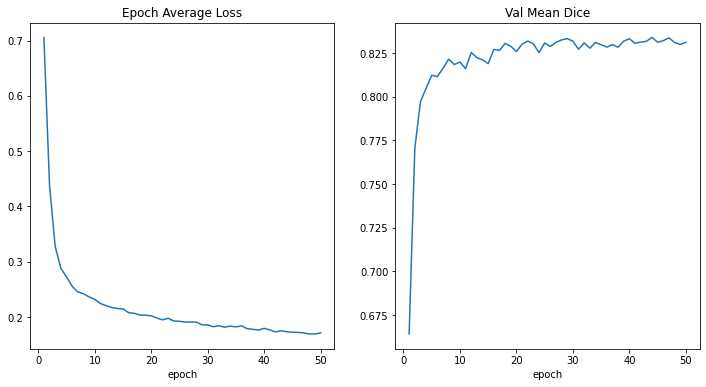

In [7]:

plt.figure("train", (12, 6))
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x = [i + 1 for i in range(len(epoch_loss_values))]
y = epoch_loss_values
plt.xlabel("epoch")
plt.plot(x, y)
plt.subplot(1, 2, 2)
plt.title("Val Mean Dice")
x = [ i + 1 for i in range(len(metric_values))]
y = metric_values
plt.xlabel("epoch")
plt.plot(x, y)
plt.show()


current epoch: 50 current mean dice: 0.8311 best mean dice: 0.8339 at epoch: 44
train completed, best_metric: 0.8339 at epoch: 44
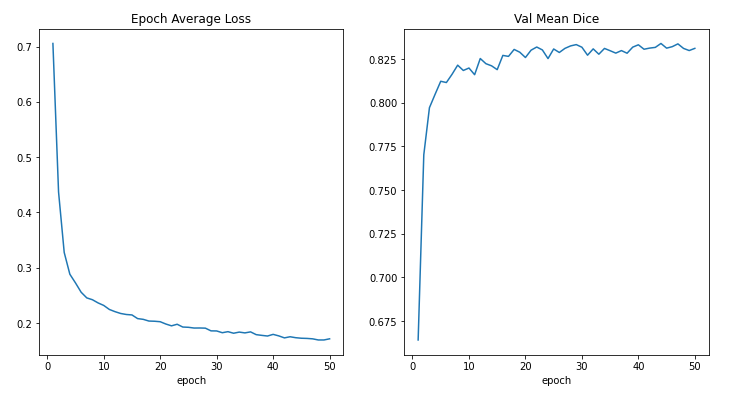